In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import spacy
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import SnowballStemmer
import string
import nltk
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n        \n"

In [2]:
#train = pd.read_csv('../input/nlp-getting-started/train.csv')
#test = pd.read_csv('../input/nlp-getting-started/test.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [3]:
# storing the labels into a variable
y_train = train['target'].values.tolist()

In [4]:
print(len(train))
print(len(test))


7613
3263


In [5]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [6]:
x = train['target'].value_counts()
print(x)

0    4342
1    3271
Name: target, dtype: int64


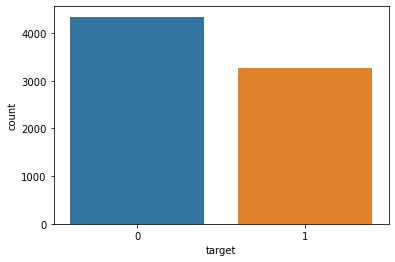

In [7]:
ax = sns.countplot(x="target", data=train)

## Data Preprocessing
- clean the data
- remove special characters, convert into lowercase


    

In [8]:
def tokenize(sentences): 
    word = []
    '''Split sentences into constituent words'''
    for w in nltk.word_tokenize(sentences.lower()):
        #print(w)
        word.append(w)
    return word

In [9]:
def normalize(strng):
    '''Word stemmer; find the root of the word. E.g. 'dogs' becomes 'dog'''
    strng = strng.lower()
    word = lmt.lemmatize(strng)
    word = stemmer.stem(strng)
    return word

In [10]:
def clean(s):
    '''Remove punctuation'''
    exclude = set(string.punctuation)
    return ''.join(ch for ch in s if ch not in exclude)


## Plotting utility functions

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Preparing text before using ML for classification

In [12]:
# cleaning the train data and storing them into two separare lists
train_cleaned = []
for s in train['text']:
    s = s.lower()
    train_cleaned.append(clean(s))
    #print(s)

#print(train_cleaned)

In [13]:
# cleaning the train data and storing them into two separare lists
test_cleaned = []
for s in test['text']:
    s = s.lower()
    test_cleaned.append(clean(s))
    #print(s)

#print(test_cleaned)

In [14]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_cleaned)



In [15]:
X_train = tokenizer.texts_to_sequences(train_cleaned)
X_test = tokenizer.texts_to_sequences(test_cleaned)

In [16]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

# checking the mapping of the words and their corresponding indices
print(train_cleaned[2])
print(X_train[2])

all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
[38, 1695, 1570, 4, 2087, 3, 651, 20, 120, 6819, 17, 1696, 40, 415, 242, 53, 2087, 3, 651, 1351, 20, 1062]


In [17]:
# padding sequences to make the length of the sequences same for all the sentences
from keras.preprocessing.sequence import pad_sequences

maxlen = 150

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [18]:
# testing the sequences
# print(X_train[0, :])

NOTE: So far one hiddlen layer with same size as embedding layer, and 0.5 dropout gave the best performance of 0.795

In [19]:
# creating keras embedding layer
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout

embedding_dim = 300

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(embedding_dim, activation='relu'))
model.add(Dropout(0.5))
#model.add(layers.Dense(100, activation='relu'))
#model.add(Dropout(0.50))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 300)          6809400   
_________________________________________________________________
flatten (Flatten)            (None, 45000)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               13500300  
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

In [20]:

from sklearn.utils import shuffle
import numpy as np

y_train = np.array(y_train)
X_train, y_train = shuffle(X_train, y_train, random_state=0)



In [21]:
# setting aside validation data from the trained

type(X_train)
X_train_val = X_train[0:1000]
y_train_val = np.array(y_train[0:1000])

X_train_partial = X_train[1000:] 
y_train_partial = np.array(y_train[1000:])
type(y_train_partial)

numpy.ndarray

In [22]:
history = model.fit(X_train_partial, y_train_partial,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_train_val, y_train_val),
                    batch_size=512)


Epoch 1/10
13/13 [==============================] - 3s 235ms/step - loss: 0.9437 - accuracy: 0.5258 - val_loss: 0.6826 - val_accuracy: 0.5860
Epoch 2/10
13/13 [==============================] - 2s 193ms/step - loss: 0.6940 - accuracy: 0.5251 - val_loss: 0.6852 - val_accuracy: 0.5860
Epoch 3/10
13/13 [==============================] - 3s 199ms/step - loss: 0.6913 - accuracy: 0.5465 - val_loss: 0.6820 - val_accuracy: 0.5860
Epoch 4/10
13/13 [==============================] - 3s 193ms/step - loss: 0.6822 - accuracy: 0.5675 - val_loss: 0.6730 - val_accuracy: 0.5860
Epoch 5/10
13/13 [==============================] - 3s 196ms/step - loss: 0.6705 - accuracy: 0.5682 - val_loss: 0.6551 - val_accuracy: 0.5860
Epoch 6/10
13/13 [==============================] - 3s 202ms/step - loss: 0.6520 - accuracy: 0.5657 - val_loss: 0.6328 - val_accuracy: 0.5860
Epoch 7/10
13/13 [==============================] - 3s 208ms/step - loss: 0.6246 - accuracy: 0.5621 - val_loss: 0.5981 - val_accuracy: 0.5860
Epoch 

In [23]:
loss, accuracy = model.evaluate(X_train_partial, y_train_partial, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_train_val, y_train_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9431
Testing Accuracy:  0.7910


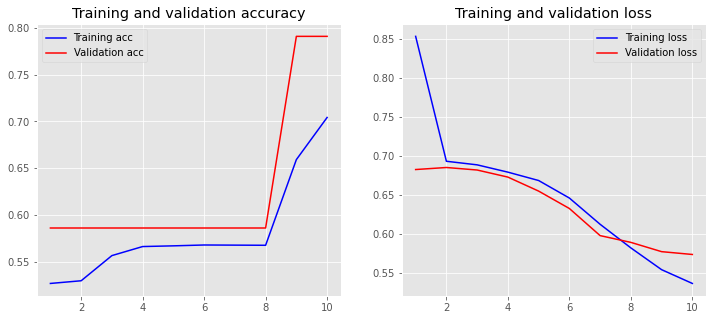

In [24]:
plot_history(history)

In [25]:
# Generate predictions for samples
predictions = model.predict(X_test)
print(predictions)

[[0.506123 ]
 [0.4063865]
 [0.506123 ]
 ...
 [0.506123 ]
 [0.506123 ]
 [0.506123 ]]


In [26]:
predictions = list(1 if x>0.5 else 0 for x in list(predictions))
predictions[:10]

[1, 0, 1, 0, 1, 0, 0, 0, 0, 0]

In [27]:
#sample = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sample = pd.read_csv('sample_submission.csv')

In [28]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [29]:
sample['target'] = predictions
sample['target'].value_counts()

0    2189
1    1074
Name: target, dtype: int64

In [31]:
sample.to_csv('submission3.csv',index=False)